#  2. Keras for Simple Regression

This notebook demonstrates the use of keras functions for simple regression problem, *Boston Housing*. The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA.

Necessary Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import datetime

Importing the file into **pandas** dataframe

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Boston.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


For the column **Boston** which is a response variable, the hot encoding / dummying needs to be done.

In [ ]:
df.shape

(506, 14)

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
X.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

In [ ]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

We now, split the data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=2023)

Converting pandas objects to numpy:

In [ ]:
y_train = y_train.values
y_test = y_test.values

Scaling the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_trn_scl = scaler_X.fit_transform(X_train)
y_trn_scl = scaler_y.fit_transform(y_train.reshape(-1,1))
y_tst_scl = scaler_y.transform(y_test.reshape(-1,1))
X_tst_scl = scaler_X.transform(X_test)

In [ ]:
X_trn_scl.shape

(354, 13)

In [ ]:
X_tst_scl.shape

(152, 13)

In [ ]:
y_trn_scl.shape

(354, 1)

Let us now define the neural network through which we plan to build the MLP model

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import metrics

**Model Definition:**

In [ ]:
tf.random.set_seed(2023)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(8, activation='relu',input_shape=(13,)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

In [ ]:
model.compile(optimizer='sgd', loss='mean_squared_error',metrics=['mae'])

**Model Fitting:**

In [ ]:
history = model.fit( X_trn_scl,y_trn_scl,validation_data=(X_tst_scl,y_tst_scl),verbose=2, epochs=500)

Epoch 1/500
12/12 - 5s - loss: 0.1477 - mae: 0.3281 - val_loss: 0.1372 - val_mae: 0.3048 - 5s/epoch - 389ms/step
Epoch 2/500
12/12 - 0s - loss: 0.1028 - mae: 0.2605 - val_loss: 0.0984 - val_mae: 0.2413 - 83ms/epoch - 7ms/step
Epoch 3/500
12/12 - 0s - loss: 0.0749 - mae: 0.2125 - val_loss: 0.0774 - val_mae: 0.2056 - 74ms/epoch - 6ms/step
Epoch 4/500
12/12 - 0s - loss: 0.0598 - mae: 0.1821 - val_loss: 0.0645 - val_mae: 0.1829 - 82ms/epoch - 7ms/step
Epoch 5/500
12/12 - 0s - loss: 0.0508 - mae: 0.1626 - val_loss: 0.0555 - val_mae: 0.1679 - 74ms/epoch - 6ms/step
Epoch 6/500
12/12 - 0s - loss: 0.0450 - mae: 0.1499 - val_loss: 0.0513 - val_mae: 0.1614 - 84ms/epoch - 7ms/step
Epoch 7/500
12/12 - 0s - loss: 0.0424 - mae: 0.1438 - val_loss: 0.0481 - val_mae: 0.1572 - 75ms/epoch - 6ms/step
Epoch 8/500
12/12 - 0s - loss: 0.0405 - mae: 0.1398 - val_loss: 0.0464 - val_mae: 0.1559 - 76ms/epoch - 6ms/step
Epoch 9/500
12/12 - 0s - loss: 0.0396 - mae: 0.1383 - val_loss: 0.0453 - val_mae: 0.1551 - 90ms/

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 112       
                                                                 
 dense_1 (Dense)             (None, 6)                 54        
                                                                 
 dense_2 (Dense)             (None, 3)                 21        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

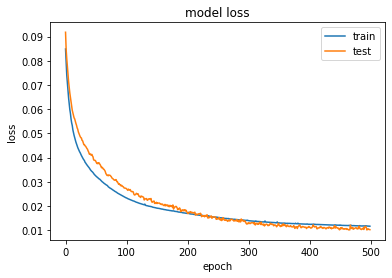

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred_ = model.predict(X_tst_scl)
MSE = mean_squared_error(y_true=y_tst_scl,y_pred=y_pred_)
print(f"MSE: {MSE}")

5/5 [==============================] - 0s 2ms/step
MSE: 0.010204994359652959


In [ ]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_true=y_tst_scl,y_pred=y_pred_)
print(f"MAE: {MAE}")

MAE: 0.07376297424803352


# Early Stopping

If we continue to train the network, it may overfit. We can have a stop point where the accuracy may start falling.

**Model Definition:**

In [ ]:
tf.random.set_seed(2022)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(8, activation='relu',input_shape=(13,)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])
model.compile(optimizer='sgd', loss='mean_squared_error',metrics=['mae'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

monitor = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=7, verbose=1,
        restore_best_weights=True)
history2 = model.fit( X_trn_scl,y_trn_scl,validation_data=(X_tst_scl,y_tst_scl),
                     callbacks=[monitor],verbose=2,epochs=500)

Epoch 1/500
12/12 - 1s - loss: 0.1227 - mae: 0.2785 - val_loss: 0.1039 - val_mae: 0.2421 - 1s/epoch - 98ms/step
Epoch 2/500
12/12 - 0s - loss: 0.0705 - mae: 0.1949 - val_loss: 0.0679 - val_mae: 0.1893 - 109ms/epoch - 9ms/step
Epoch 3/500
12/12 - 0s - loss: 0.0534 - mae: 0.1679 - val_loss: 0.0610 - val_mae: 0.1792 - 103ms/epoch - 9ms/step
Epoch 4/500
12/12 - 0s - loss: 0.0497 - mae: 0.1614 - val_loss: 0.0579 - val_mae: 0.1726 - 84ms/epoch - 7ms/step
Epoch 5/500
12/12 - 0s - loss: 0.0474 - mae: 0.1555 - val_loss: 0.0551 - val_mae: 0.1677 - 84ms/epoch - 7ms/step
Epoch 6/500
12/12 - 0s - loss: 0.0455 - mae: 0.1510 - val_loss: 0.0518 - val_mae: 0.1650 - 71ms/epoch - 6ms/step
Epoch 7/500
12/12 - 0s - loss: 0.0442 - mae: 0.1507 - val_loss: 0.0507 - val_mae: 0.1615 - 74ms/epoch - 6ms/step
Epoch 8/500
12/12 - 0s - loss: 0.0430 - mae: 0.1471 - val_loss: 0.0485 - val_mae: 0.1604 - 81ms/epoch - 7ms/step
Epoch 9/500
12/12 - 0s - loss: 0.0421 - mae: 0.1471 - val_loss: 0.0484 - val_mae: 0.1577 - 71ms

Let us see the parameters in the early stopping involved:
- **monitor**: quantity to be monitored.<br>
- **min_delta**: minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.<br>
- **patience**: number of epochs with no improvement after which training will be stopped.<br>
- **restore_best_weights**: whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used.

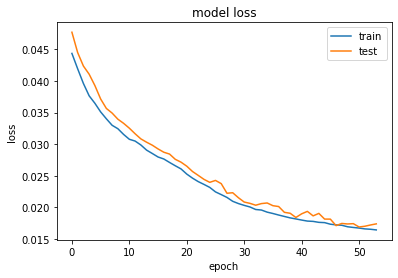

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred_ = model.predict(X_tst_scl)
MSE = mean_squared_error(y_true=y_tst_scl,y_pred=y_pred_)
print(f"MSE: {MSE}")

5/5 [==============================] - 0s 2ms/step
MSE: 0.01710203843513103


In [ ]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_true=y_tst_scl,y_pred=y_pred_)
print(f"MAE: {MAE}")

MAE: 0.10040556127456023


Scaled Predictions:

In [ ]:
y_pred_[:10]

array([[0.2772921 ],
       [0.38664147],
       [0.46365884],
       [0.4195871 ],
       [0.4683882 ],
       [0.6930782 ],
       [0.2849858 ],
       [0.5855141 ],
       [0.42359075],
       [0.08795495]], dtype=float32)

Scaling the Predictions to original scale

In [ ]:
y_pred = scaler_y.inverse_transform(y_pred_)
y_pred[:10]

array([[17.478144],
       [22.398867],
       [25.864649],
       [23.88142 ],
       [26.077469],
       [36.18852 ],
       [17.824362],
       [31.348135],
       [24.061584],
       [ 8.957973]], dtype=float32)

In [ ]:
MSE = mean_squared_error(y_true=y_test,y_pred=y_pred)
print(f"MSE: {MSE}")

MSE: 34.63163003182857
